# 1. Machine Deficiency

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Define transition probability matrix
P = np.array([[0.9, 0.1],  # From Operational (O)
              [0.4, 0.6]]) # From Failed (F)

print('Transition Matrix::\n', P)

Transition Matrix::
 [[0.9 0.1]
 [0.4 0.6]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define transition probability matrix
P = np.array([[0.9, 0.1],  # From Operational (O)
              [0.4, 0.6]]) # From Failed (F)

# Number of days to simulate
num_days = 10000

# Initial state: Operational (1)
states = np.zeros(num_days, dtype=int)
states[0] = 1  # 1 for Operational, 0 for Failed

# Simulate state transitions
for t in range(1, num_days):
    current_state = states[t-1]
    states[t] = np.random.choice([1, 0], p=P[current_state])

# Discussing results
operational_ratio = np.sum(states) / num_days
failed_ratio = 1 - operational_ratio
operational_ratio, failed_ratio


(0.602, 0.398)

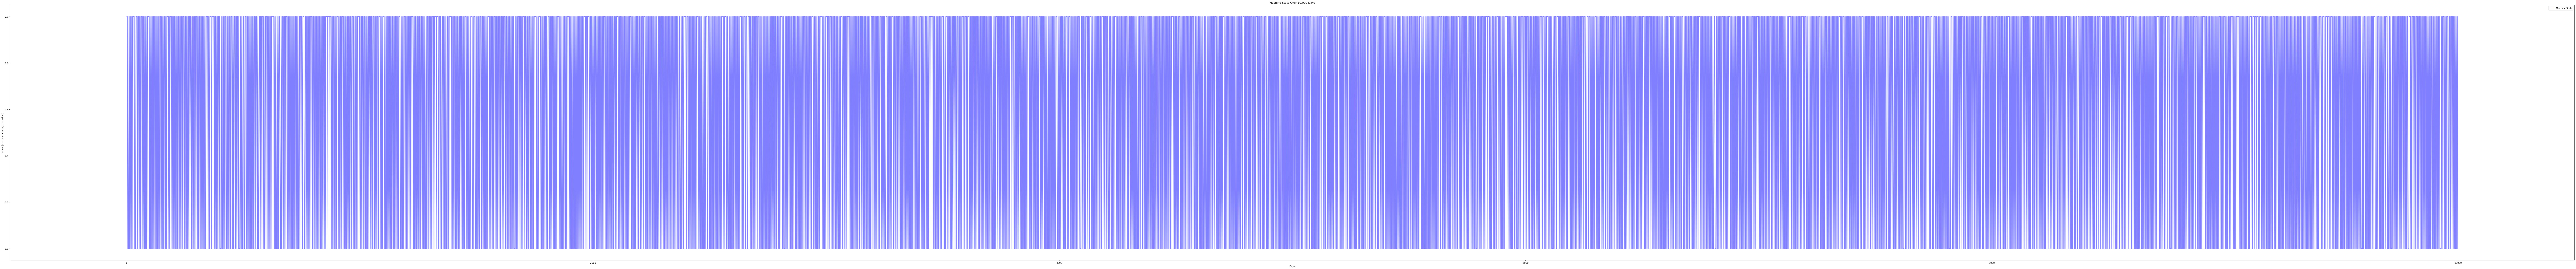

In [15]:
# Plot the results
plt.figure(figsize=(200, 20))
plt.plot(states, label="Machine State", color='b', alpha=0.5)
plt.xlabel("Days")
plt.ylabel("State (1 = Operational, 0 = Failed)")
plt.title("Machine State Over 10,000 Days")
plt.legend()
plt.show()


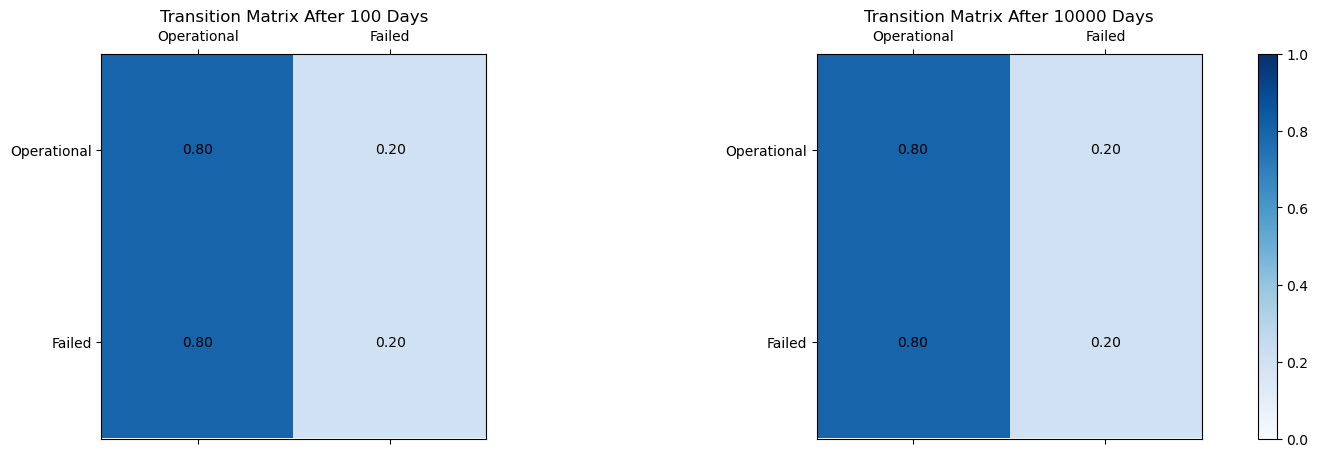

In [16]:
# Define states
states = ['Operational', 'Failed']


P_100 = np.linalg.matrix_power(P, 1000)
P_10000 = np.linalg.matrix_power(P, 10000)

# Convert to DataFrames for better visualization
df_P_100 = pd.DataFrame(P_100, index=states, columns=states)
df_P_10000 = pd.DataFrame(P_10000, index=states, columns=states)


# Plot the transition matrices over different time steps
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

time_steps = [100, 10000]
matrices = [P_100, P_10000]

for i, (ax, P_t, t) in enumerate(zip(axes, matrices, time_steps)):
    cax = ax.matshow(P_t, cmap='Blues', vmin=0, vmax=1)
    ax.set_xticks(range(2))
    ax.set_yticks(range(2))
    ax.set_xticklabels(states)
    ax.set_yticklabels(states)
    ax.set_title(f'Transition Matrix After {t} Days')
    
    for (j, k), val in np.ndenumerate(P_t):
        ax.text(k, j, f"{val:.2f}", ha='center', va='center', color='black')

fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()

# 2. Brownian Motion

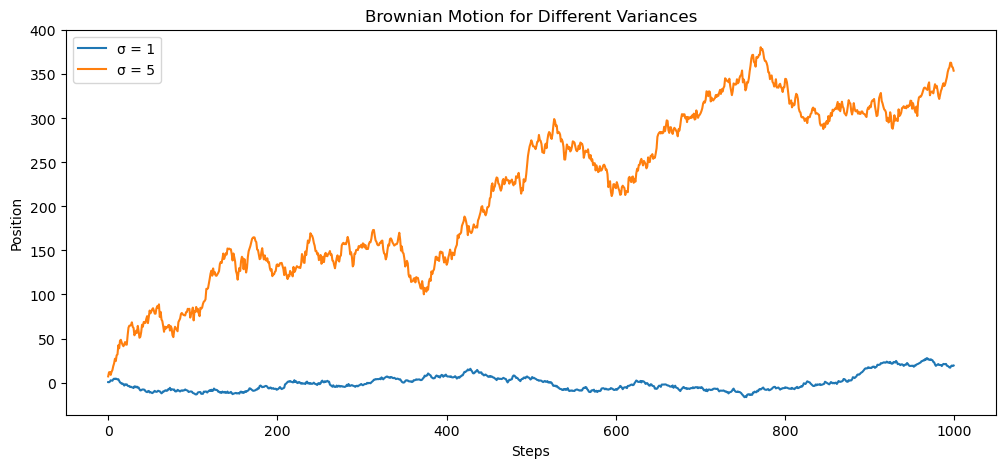

In [17]:
# Parameters
num_steps = 1000  # Number of steps
sigma_values = [1, 5]  # Different variances

# Initialize Brownian motion paths
np.random.seed(42)  
brownian_paths = {}

# Simulate Brownian motion for both sigma values
for sigma in sigma_values:
    noise = np.random.normal(0, sigma, num_steps)  # Random Gaussian noise
    path = np.cumsum(noise)  
    brownian_paths[sigma] = path

# Plot the Brownian motion paths
plt.figure(figsize=(12, 5))
for sigma, path in brownian_paths.items():
    plt.plot(path, label=f"σ = {sigma}")

plt.xlabel("Steps")
plt.ylabel("Position")
plt.title("Brownian Motion for Different Variances")
plt.legend()
plt.show()


##  Discussion of the Results:
Effect of Variance (σ):

- The orange curve (σ = 5) exhibits larger fluctuations, meaning the particle moves much more erratically.
- The yellow curve (σ = 1) is much smoother, with smaller movements at each step.
Interpretation of Brownian Motion:
- Higher variance means greater uncertainty in movement.
- When σ is larger, the particle explores a wider range of positions more quickly.


# 3. Disease Progression

In [18]:
# Define the transition probability matrix
P = np.array([[0.6, 0.3, 0.1],
              [0.2, 0.5, 0.3],
              [0.4, 0.5, 0.1]])

print('Transition Matrix::\n', P)

Transition Matrix::
 [[0.6 0.3 0.1]
 [0.2 0.5 0.3]
 [0.4 0.5 0.1]]


________________________________________
Healthy:: 0.422
Mild:: 0.408
Severe:: 0.17
________________________________________


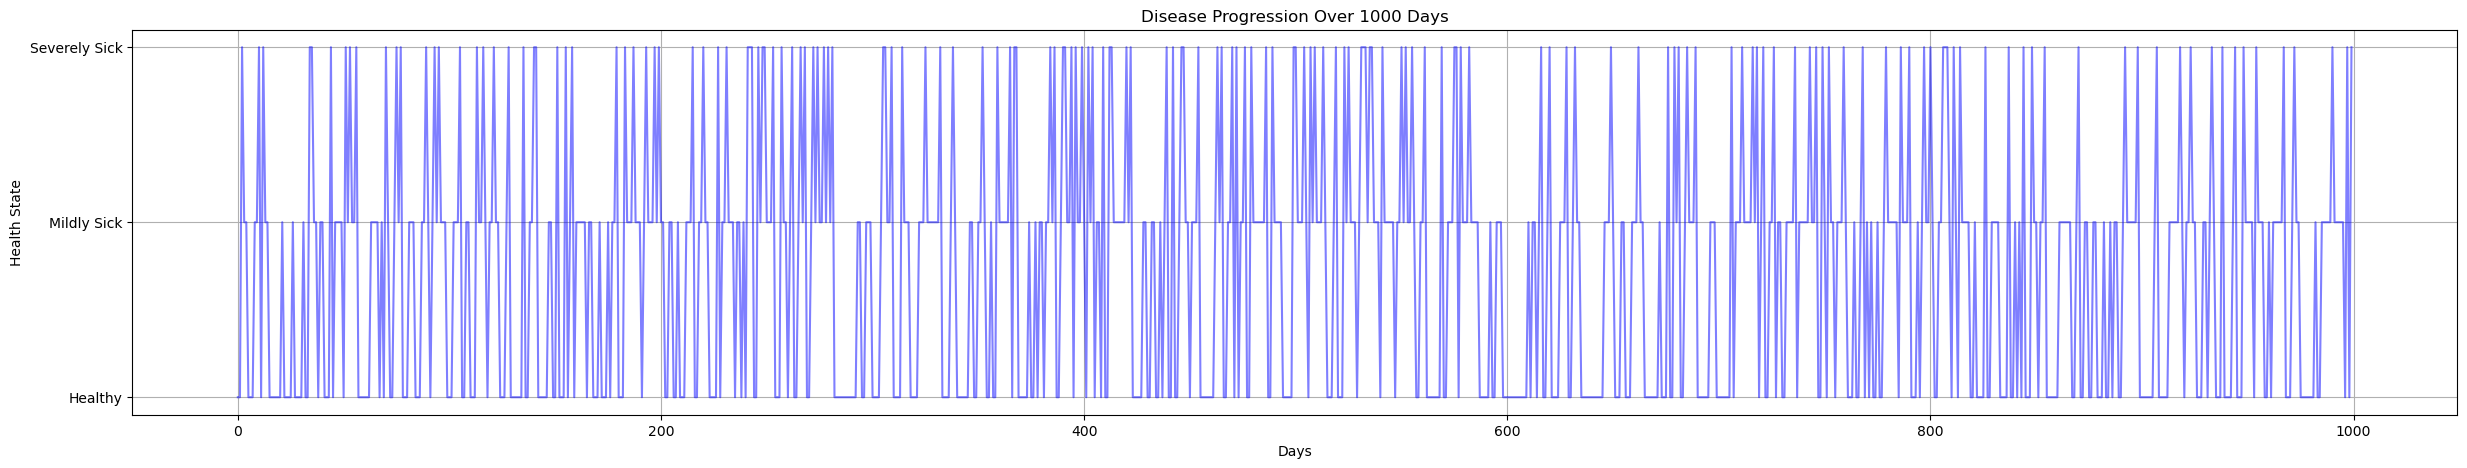

In [21]:
# Define states
states = ['Healthy', 'Mildly Sick', 'Severely Sick']

# Simulate 1000 days
np.random.seed(42)  
num_days = 1000
state_history = np.zeros(num_days, dtype=int)
state_history[0] = 0  # Start from 'Healthy'

for i in range(1, num_days):
    current_state = state_history[i-1]
    next_state = np.random.choice([0, 1, 2], p=P[current_state])
    state_history[i] = next_state


ratio_H = np.sum(state_history == 0) / num_days
ratio_M = np.sum(state_history == 1) / num_days
ratio_C = np.sum(state_history == 2) / num_days

print('_'*40)
print('Healthy::', ratio_H)
print('Mild::', ratio_M)
print('Severe::', ratio_C)
print('_'*40)

# Plot the simulation results
plt.figure(figsize=(30, 5))
plt.plot(state_history, label='Patient Health State', color='blue', alpha=0.5)
plt.yticks([0, 1, 2], states)
plt.xlabel("Days")
plt.ylabel("Health State")
plt.title("Disease Progression Over 1000 Days")
plt.grid(True)
plt.show()


Healthy:: 0.422
Mild:: 0.408
Severe:: 0.17


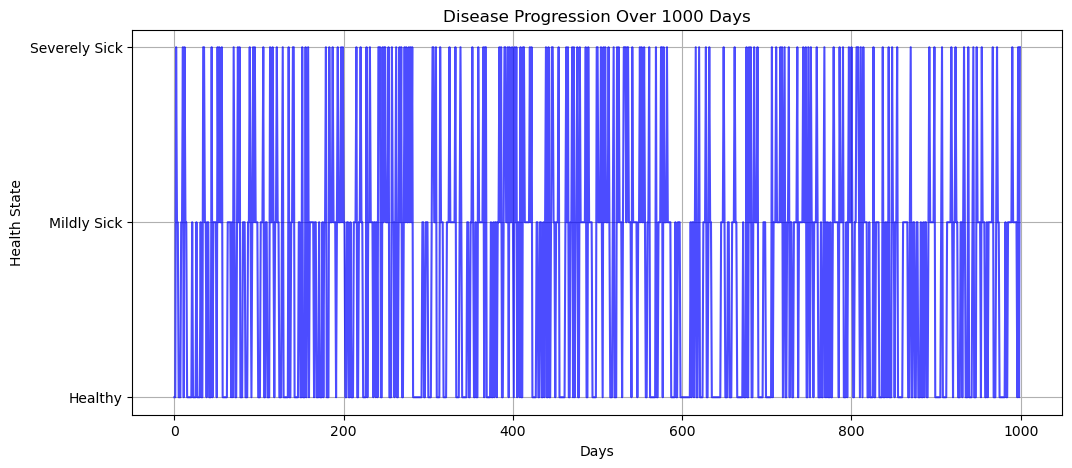

,Healthy,Mildly Sick,Severely Sick
Healthy,0.394737,0.421053,0.184211
Mildly Sick,0.394737,0.421053,0.184211
Severely Sick,0.394737,0.421053,0.184211


In [22]:



# Define states
states = ['Healthy', 'Mildly Sick', 'Severely Sick']

# Simulate the Markov process for 1000 days
np.random.seed(42)  # For reproducibility
num_days = 1000
state_history = np.zeros(num_days, dtype=int)
state_history[0] = 0  # Start from 'Healthy'

for i in range(1, num_days):
    current_state = state_history[i-1]
    next_state = np.random.choice([0, 1, 2], p=P[current_state])
    state_history[i] = next_state


ratio_H = np.sum(state_history == 0) / num_days
ratio_M = np.sum(state_history == 1) / num_days
ratio_C = np.sum(state_history == 2) / num_days

print('Healthy::', ratio_H)
print('Mild::', ratio_M)
print('Severe::', ratio_C)

# Plot the simulation results
plt.figure(figsize=(12, 5))
plt.plot(state_history, label='Patient Health State', color='blue', alpha=0.7)
plt.yticks([0, 1, 2], states)
plt.xlabel("Days")
plt.ylabel("Health State")
plt.title("Disease Progression Over 1000 Days")
plt.grid(True)
plt.show()

# Compute the transition probability matrix after 1000 days
P_1000 = np.linalg.matrix_power(P, 100)

# Display the long-term transition probability matrix
import pandas as pd
df_P_1000 = pd.DataFrame(P_1000, index=states, columns=states)
df_P_1000


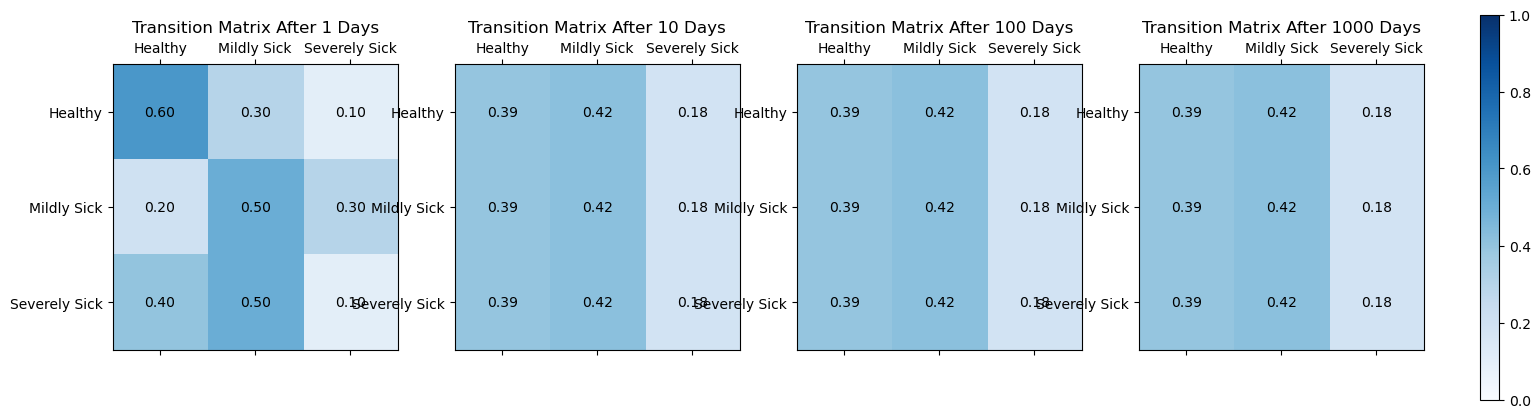

In [18]:
# Define states
states = ['Healthy', 'Mildly Sick', 'Severely Sick']

# Compute transition matrices using Chapman-Kolmogorov equation 
P_10 = np.linalg.matrix_power(P, 10)
P_100 = np.linalg.matrix_power(P, 100)
P_1000 = np.linalg.matrix_power(P, 1000)

# Convert to DataFrames for better visualization
df_P_10 = pd.DataFrame(P_10, index=states, columns=states)
df_P_100 = pd.DataFrame(P_100, index=states, columns=states)
df_P_1000 = pd.DataFrame(P_1000, index=states, columns=states)


# Plot the transition matrices over different time steps
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

time_steps = [1, 10, 100, 1000]
matrices = [P, P_10, P_100, P_1000]

for i, (ax, P_t, t) in enumerate(zip(axes, matrices, time_steps)):
    cax = ax.matshow(P_t, cmap='Blues', vmin=0, vmax=1)
    ax.set_xticks(range(3))
    ax.set_yticks(range(3))
    ax.set_xticklabels(states)
    ax.set_yticklabels(states)
    ax.set_title(f'Transition Matrix After {t} Days')
    
    for (j, k), val in np.ndenumerate(P_t):
        ax.text(k, j, f"{val:.2f}", ha='center', va='center', color='black')

fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()
